In [7]:
#import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#Load your country's dataset into a DataFrame:

df = pd.read_csv('data/benin-malanville.csv') 
#Summary Statistics:
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [10]:
#Missing Values:

missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_report[missing_report['Percentage'] > 5])


          Missing Values  Percentage
Comments          525600       100.0


In [9]:
# Outlier Detection & Basic Cleaning
#Compute Z-scores:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers = (z_scores > 3)

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


C:\Users\ayedr\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


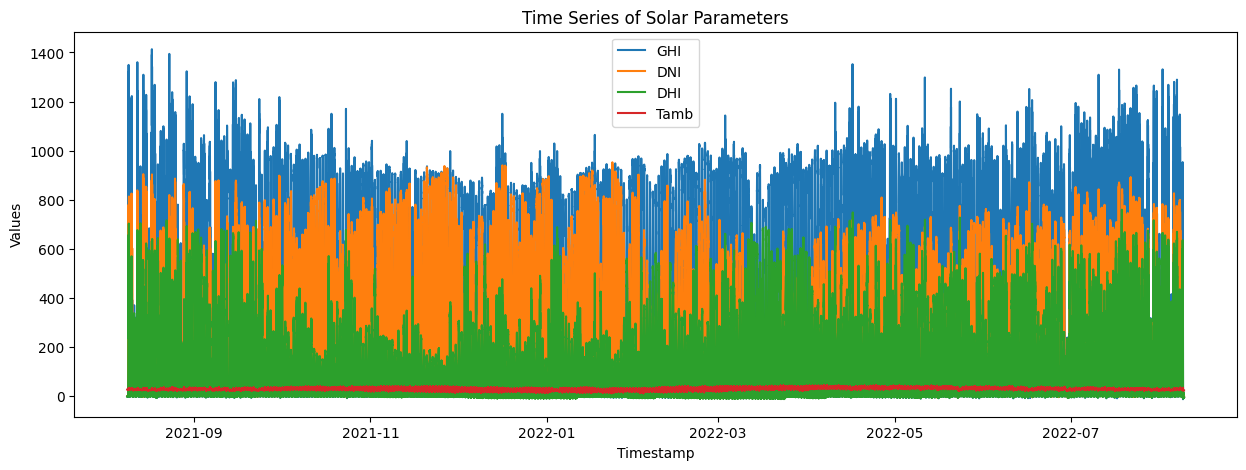

In [13]:
#Handle Missing Values:

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
#Export Cleaned Data:
df.to_csv('data/Benin_clean.csv', index=False)
#Convert Timestamp:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#Plot Time Series:
plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series of Solar Parameters')
plt.show()


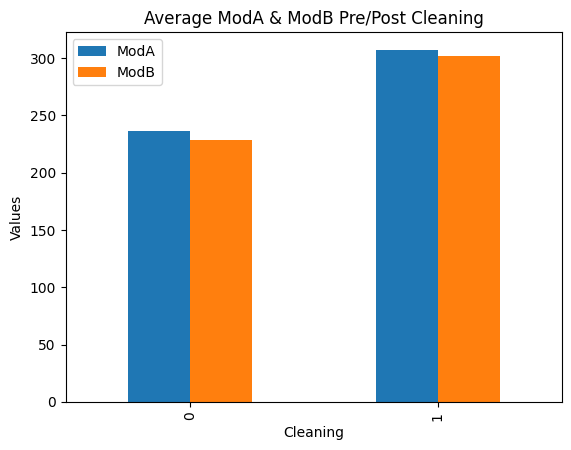

In [14]:
#Cleaning Impact
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.ylabel('Values')
plt.show()


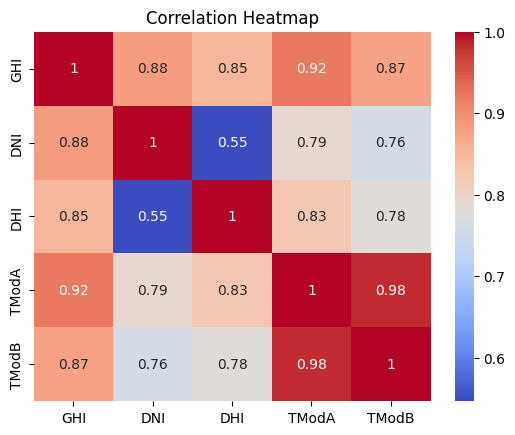

In [15]:
#Correlation Heatmap:
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


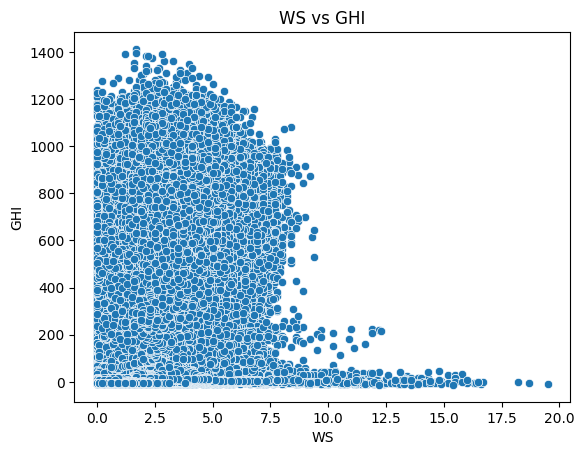

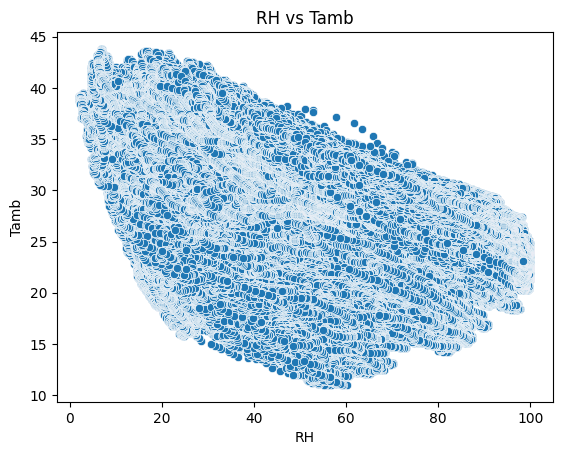

In [16]:
#Scatter Plots:

sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('WS vs GHI')
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Tamb')
plt.show()


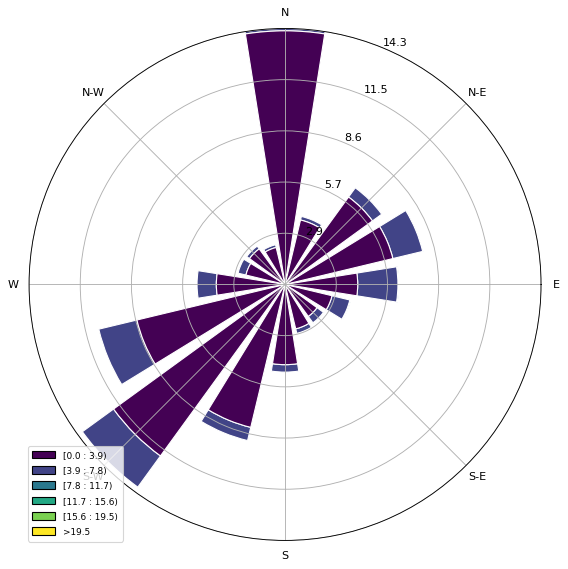

In [20]:
#Wind & Distribution Analysis
#Wind Rose Plot:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


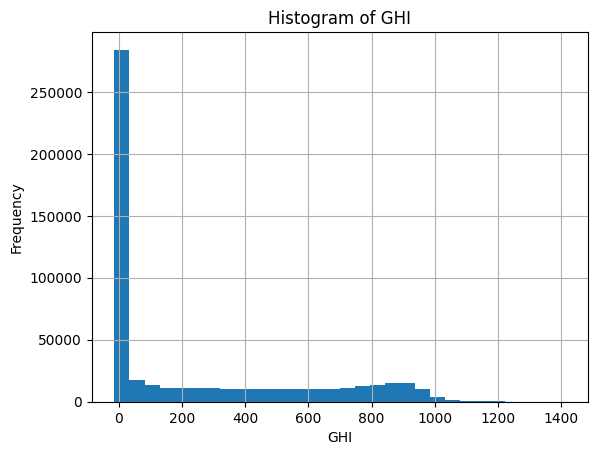

In [22]:
#Histograms:

df['GHI'].hist(bins=30)
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

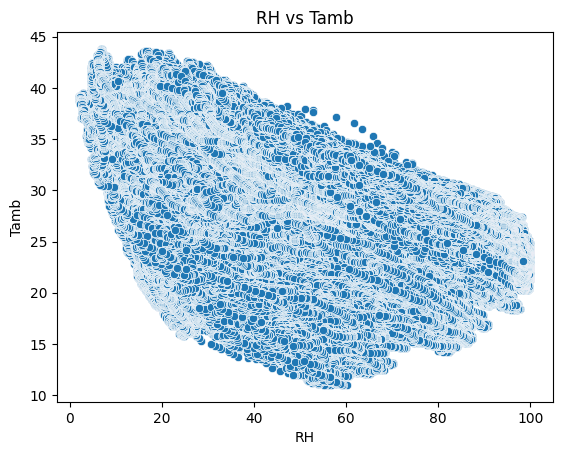

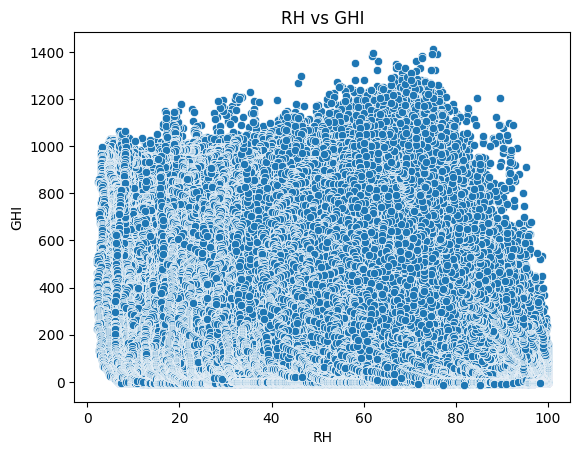

In [23]:
#Temperature Analysis

sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Tamb')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs GHI')
plt.show()